# <span style="color: violet;">Classification Model - Customer churn EDA</span>


## <span style="color: violet;">Introduction:</span>


#### Churn prediction is a common problem in the field of customer analytics, where the goal is to predict which customers are likely to churn or leave a service. In this context, classification models can be used to predict whether a customer is likely to churn or not, based on their past behavior and interactions with the service.

### <span style="color: violet;">Importing Data</span>


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Ecommerce churn.csv")
data.head(4)

,Unnamed: 0,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,...,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,...,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,...,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,...,Laptop & Accessory,589314,Single,8,0,23.0,0.0,1.0,3.0,134.07


### <span style="color: violet;">Data exploration</span>


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16890 entries, 0 to 16889
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   16890 non-null  int64  
 1   CustomerID                   16890 non-null  int64  
 2   Churn                        16890 non-null  int64  
 3   Tenure                       16107 non-null  float64
 4   PreferredLoginDevice         16890 non-null  object 
 5   CityTier                     16890 non-null  int64  
 6   WarehouseToHome              15555 non-null  float64
 7   PreferredPaymentMode         16290 non-null  object 
 8   Gender                       16890 non-null  object 
 9   HourSpendOnApp               16125 non-null  float64
 10  NumberOfDeviceRegistered     16290 non-null  float64
 11  PreferedOrderCat             16890 non-null  object 
 12  SatisfactionScore            16890 non-null  int64  
 13  MaritalStatus   

### <span style="color: violet;">Handling Missing Value</span>


In [4]:
data.isnull().sum()

Unnamed: 0                        0
CustomerID                        0
Churn                             0
Tenure                          783
PreferredLoginDevice              0
CityTier                          0
WarehouseToHome                1335
PreferredPaymentMode            600
Gender                            0
HourSpendOnApp                  765
NumberOfDeviceRegistered        600
PreferedOrderCat                  0
SatisfactionScore                 0
MaritalStatus                   600
NumberOfAddress                   0
Complain                          0
OrderAmountHikeFromlastYear     795
CouponUsed                      768
OrderCount                      774
DaySinceLastOrder               921
CashbackAmount                    0
dtype: int64

In [5]:
data["Tenure"].value_counts()

 1.0        2028
 0.0        1479
 8.0         771
 9.0         720
 7.0         648
 10.0        633
 5.0         603
 4.0         600
 3.0         576
 11.0        567
 6.0         546
 13.0        531
 14.0        522
 12.0        522
 2.0         498
 15.0        474
 16.0        444
 19.0        411
 18.0        360
 20.0        321
 17.0        315
-10000.0     300
 23.0        267
 21.0        249
 22.0        228
 24.0        225
 28.0        210
 30.0        198
 27.0        192
 26.0        180
 25.0        171
 29.0        162
 31.0        144
 50.0          3
 60.0          3
 51.0          3
 61.0          3
Name: Tenure, dtype: int64

In [6]:
data["Tenure"].fillna(method="ffill",inplace=True)

In [7]:
data["WarehouseToHome"].value_counts()

9.0      1623
8.0      1287
7.0      1116
16.0      912
14.0      861
6.0       840
15.0      831
10.0      792
13.0      735
11.0      675
17.0      633
12.0      630
31.0      300
22.0      300
32.0      282
23.0      273
35.0      273
18.0      264
30.0      264
26.0      258
24.0      252
25.0      252
21.0      249
27.0      243
29.0      228
19.0      213
20.0      210
28.0      201
33.0      198
34.0      186
36.0      144
5.0        24
126.0       3
127.0       3
Name: WarehouseToHome, dtype: int64

In [8]:
data["WarehouseToHome"].fillna(method="bfill",inplace=True)

In [9]:
data["PreferredPaymentMode"].value_counts()

Debit Card          6687
Credit Card         4347
E wallet            1791
UPI                 1176
COD                 1068
CC                   789
Cash on Delivery     432
Name: PreferredPaymentMode, dtype: int64

In [10]:
data["PreferredPaymentMode"].fillna(method="bfill",inplace=True)

In [11]:
data["HourSpendOnApp"].value_counts()

3.0    8061
2.0    4413
4.0    3528
1.0     105
0.0       9
5.0       9
Name: HourSpendOnApp, dtype: int64

In [12]:
data["HourSpendOnApp"].fillna(method="bfill",inplace=True)

In [13]:
data["NumberOfDeviceRegistered"].value_counts()

4.0    6849
3.0    4944
5.0    2562
2.0     789
1.0     687
6.0     459
Name: NumberOfDeviceRegistered, dtype: int64

In [14]:
data["NumberOfDeviceRegistered"].fillna(method="ffill",inplace=True)

In [15]:
data["MaritalStatus"].value_counts()

Married     8637
Single      5178
Divorced    2475
Name: MaritalStatus, dtype: int64

In [16]:
data["MaritalStatus"].fillna(method="ffill",inplace=True)

In [17]:
data["OrderAmountHikeFromlastYear"].value_counts()

14.0    2250
13.0    2223
12.0    2184
15.0    1626
11.0    1173
16.0     999
18.0     963
19.0     933
17.0     891
20.0     729
21.0     570
22.0     552
23.0     432
24.0     252
25.0     219
26.0      99
Name: OrderAmountHikeFromlastYear, dtype: int64

In [18]:
data["OrderAmountHikeFromlastYear"].fillna(method="ffill",inplace=True)

In [19]:
data["CouponUsed"].value_counts()

1.0     6315
2.0     3849
0.0     3090
3.0      981
4.0      591
5.0      387
6.0      324
7.0      267
8.0      126
10.0      42
9.0       39
11.0      36
12.0      27
13.0      24
14.0      15
16.0       6
15.0       3
Name: CouponUsed, dtype: int64

In [20]:
data["CouponUsed"].fillna(method="ffill",inplace=True)

In [21]:
data["OrderCount"].value_counts()

2.0     6075
1.0     5253
3.0     1113
7.0      618
4.0      612
5.0      543
8.0      516
6.0      411
9.0      186
12.0     162
11.0     153
10.0     108
14.0     108
15.0      99
13.0      90
16.0      69
Name: OrderCount, dtype: int64

In [22]:
data["OrderCount"].fillna(method="bfill",inplace=True)

In [23]:
data["DaySinceLastOrder"].value_counts()

3.0     2700
2.0     2376
1.0     1842
8.0     1614
0.0     1488
7.0     1341
4.0     1293
9.0      897
5.0      684
10.0     471
6.0      339
11.0     273
12.0     207
13.0     153
14.0     105
15.0      57
17.0      51
16.0      39
18.0      30
30.0       3
46.0       3
31.0       3
Name: DaySinceLastOrder, dtype: int64

In [24]:
data["DaySinceLastOrder"].fillna(method="bfill",inplace=True)

In [25]:
data.isnull().sum()

Unnamed: 0                     0
CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [26]:
data.head()

,Unnamed: 0,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,...,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,50002,1,4.0,Phone,1,8.0,UPI,Male,3.0,...,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,2,50003,1,4.0,Phone,1,30.0,Debit Card,Male,2.0,...,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,...,Laptop & Accessory,589314,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,...,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


### <span style="color: violet;">Finding Outliers and Removing</span>


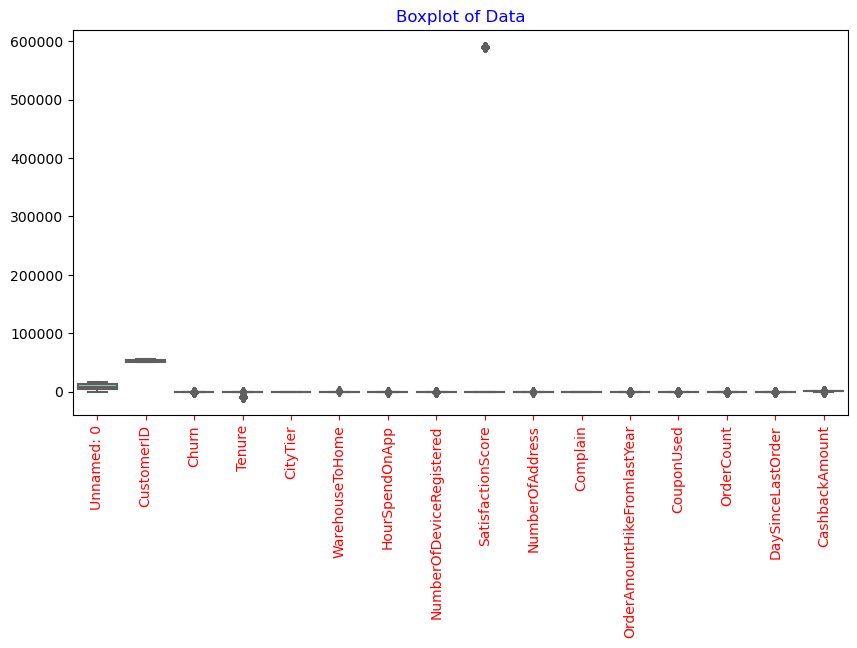

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=data, ax=ax, palette='Set3')
ax.set_title('Boxplot of Data', color='blue',)
ax.tick_params(axis='x', labelrotation=90, colors='red')
plt.show()

In [28]:
import warnings
import scipy.stats as stat
import seaborn as sns
import matplotlib.pyplot as plt

def plot_data(dataframe, feature):
    warnings.filterwarnings("ignore")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    sns.boxplot(dataframe[feature], saturation=5.0, width=.25, ax=ax1)
    ax1.set_title('Box Plot of Data',color='blue',)
    ax1.set_xlabel(feature ,color='red')

    sns.distplot(dataframe[feature], kde=True, rug=True, color='blue',
                 kde_kws={"color": "red", "lw": 2, "alpha": 0.7},
                 hist_kws={"linewidth":.5, "alpha": 0.25}, ax=ax2)
    ax2.set_title('Distribution Plot of Data',color='blue',)
    ax2.set_xlabel(feature ,color='red')
    plt.show()

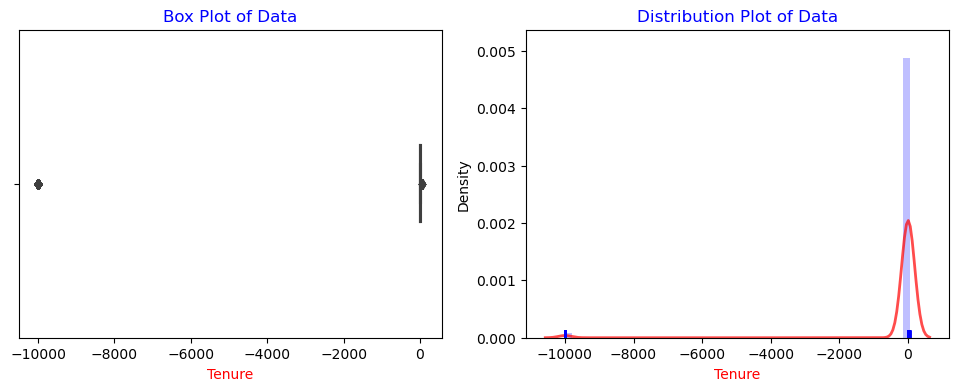

In [29]:
plot_data(data,"Tenure")

In [30]:
Q1 = data["Tenure"].quantile(0.25)
Q3 = data["Tenure"].quantile(0.75)
IQR = Q3 - Q1
tenuredata=data[(data["Tenure"] >= Q1 - 1.5*IQR) & (data["Tenure"] <= Q3 + 1.5*IQR)]
cleandata=data.merge(tenuredata,how="inner",indicator=False)
print("original data count                              :",len(data))
print("Count of outlier removed data                    :",len(tenuredata))
print("Count of after removing outlier of the dataframe :",len(cleandata))


original data count                              : 16890
Count of outlier removed data                    : 16569
Count of after removing outlier of the dataframe : 16569


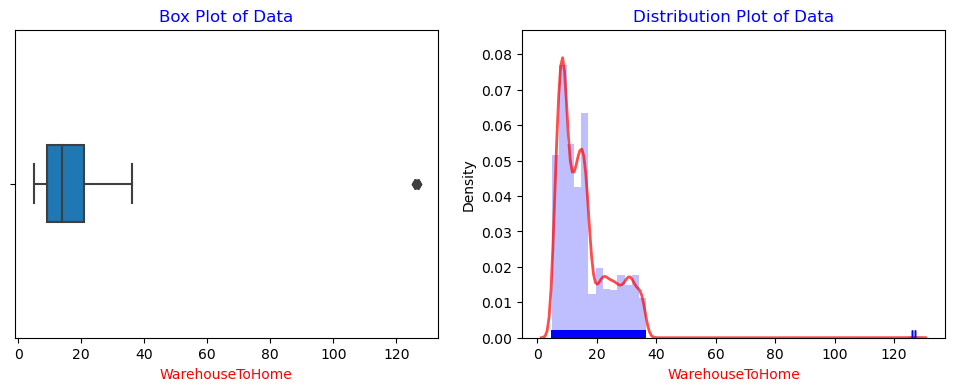

In [31]:
plot_data(data,"WarehouseToHome")

In [32]:
Q1 = data["WarehouseToHome"].quantile(0.25)
Q3 = data["WarehouseToHome"].quantile(0.75)
IQR = Q3 - Q1
waredata=data[(data["WarehouseToHome"] >= Q1 - 1.5*IQR) & (data["WarehouseToHome"] <= Q3 + 1.5*IQR)]
cleandata=cleandata.merge(waredata,how="inner",indicator=False)
print("original data count                              :",len(data))
print("Count of outlier removed data                    :",len(waredata))
print("Count of after removing outlier of the dataframe :",len(cleandata))



original data count                              : 16890
Count of outlier removed data                    : 16884
Count of after removing outlier of the dataframe : 16563


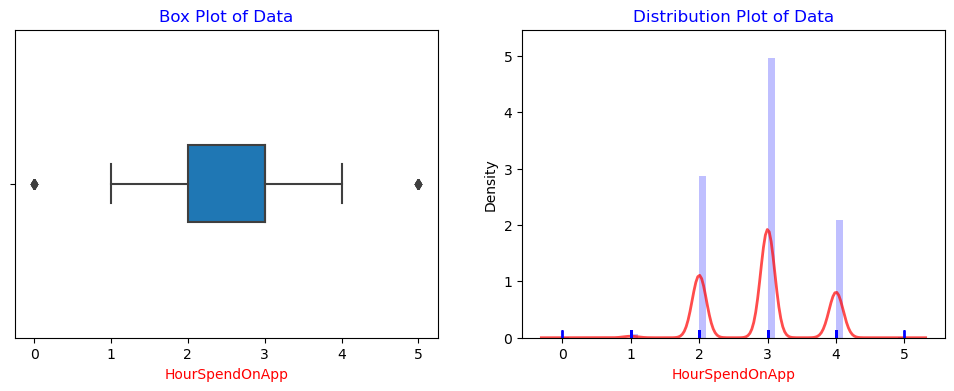

In [33]:
plot_data(data,"HourSpendOnApp")

In [34]:
Q1 = data["HourSpendOnApp"].quantile(0.25)
Q3 = data["HourSpendOnApp"].quantile(0.75)
IQR = Q3 - Q1
hourdata=data[(data["HourSpendOnApp"] >= Q1 - 1.5*IQR) & (data["HourSpendOnApp"] <= Q3 + 1.5*IQR)]
cleandata=cleandata.merge(hourdata,how="inner",indicator=False)
print("original data count                              :",len(data))
print("Count of outlier removed data                    :",len(hourdata))
print("Count of after removing outlier of the dataframe :",len(cleandata))


original data count                              : 16890
Count of outlier removed data                    : 16872
Count of after removing outlier of the dataframe : 16545


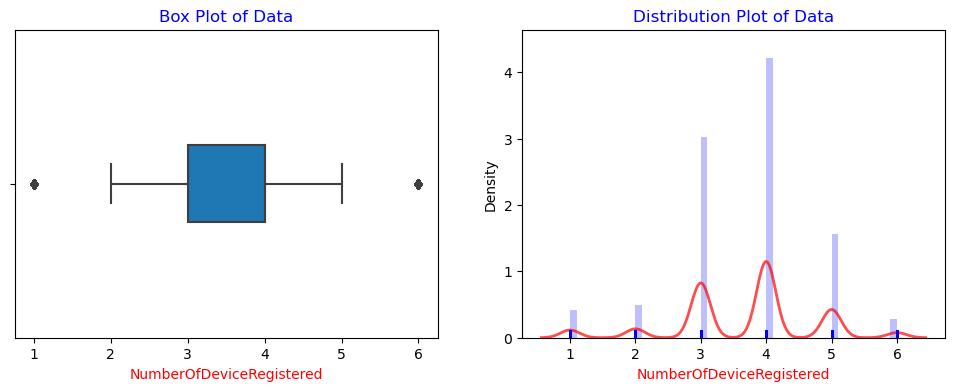

In [35]:
plot_data(data,"NumberOfDeviceRegistered")

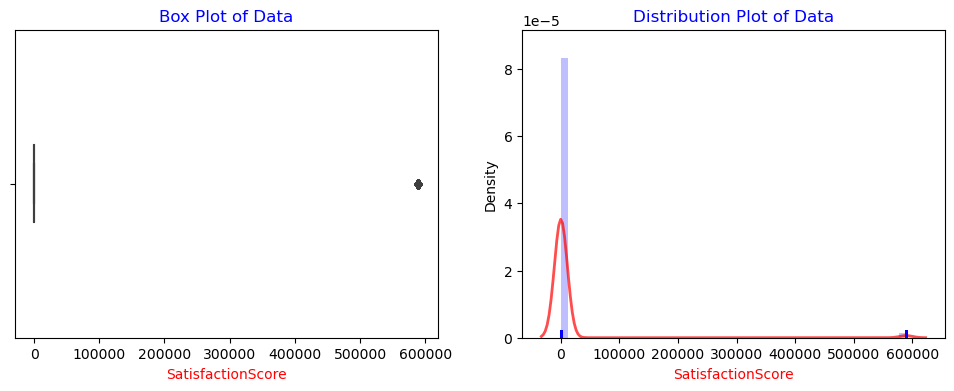

In [36]:
plot_data(data,"SatisfactionScore")

In [37]:
Q1 = data["SatisfactionScore"].quantile(0.25)
Q3 = data["SatisfactionScore"].quantile(0.75)
IQR = Q3 - Q1
satdata=data[(data["SatisfactionScore"] >= Q1 - 1.5*IQR) & (data["SatisfactionScore"] <= Q3 + 1.5*IQR)]
cleandata=cleandata.merge(satdata,how="inner",indicator=False)
print("original data count                              :",len(data))
print("Count of outlier removed data                    :",len(satdata))
print("Count of after removing outlier of the dataframe :",len(cleandata))


original data count                              : 16890
Count of outlier removed data                    : 16590
Count of after removing outlier of the dataframe : 16254


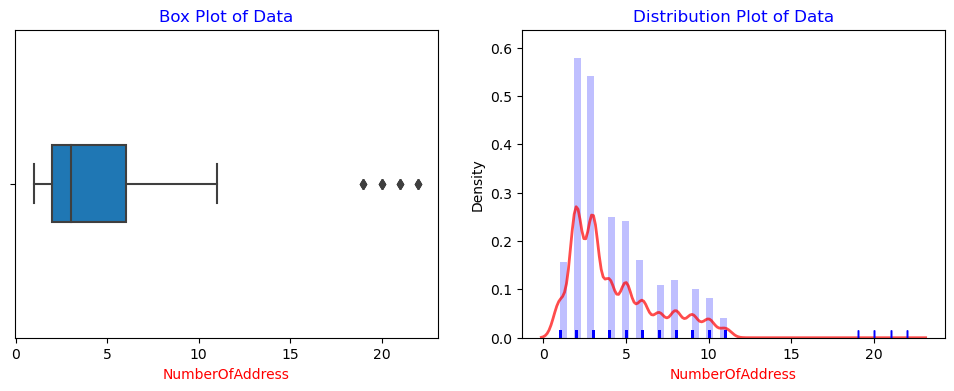

In [38]:
plot_data(data,"NumberOfAddress")

In [39]:
Q1 = data["NumberOfAddress"].quantile(0.25)
Q3 = data["NumberOfAddress"].quantile(0.75)
IQR = Q3 - Q1
addredata=data[(data["NumberOfAddress"] >= Q1 - 1.5*IQR) & (data["NumberOfAddress"] <= Q3 + 1.5*IQR)]
cleandata=cleandata.merge(addredata,how="inner",indicator=False)
print("original data count                              :",len(data))
print("Count of outlier removed data                    :",len(addredata))
print("Count of after removing outlier of the dataframe :",len(cleandata))



original data count                              : 16890
Count of outlier removed data                    : 16878
Count of after removing outlier of the dataframe : 16242


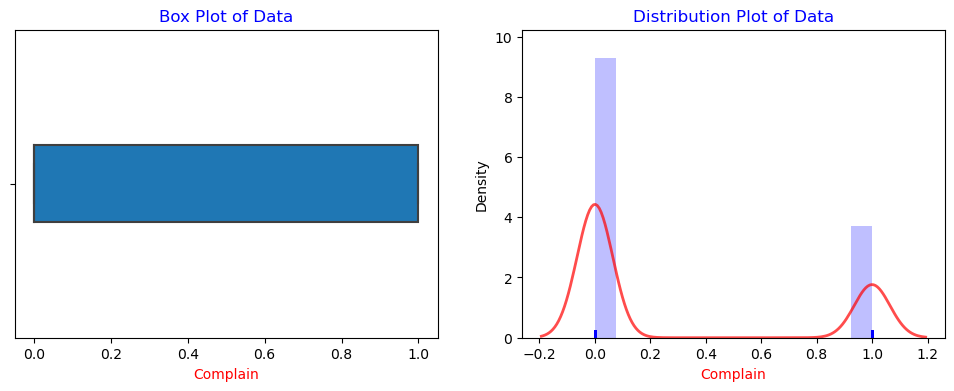

In [40]:
plot_data(data,"Complain")

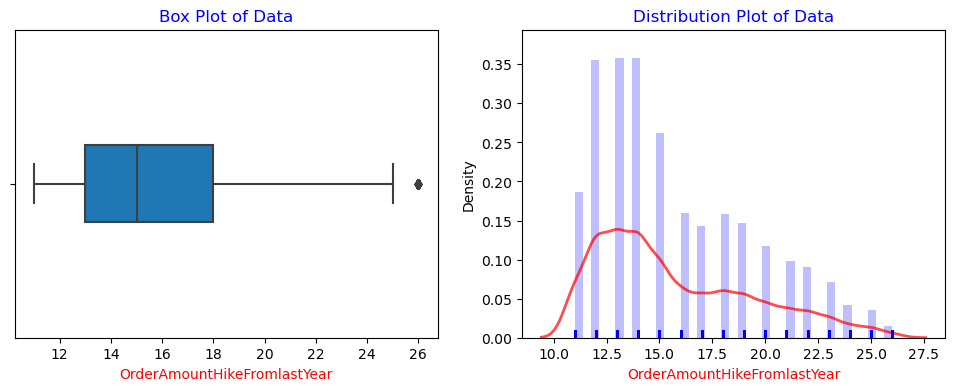

In [41]:
plot_data(data,"OrderAmountHikeFromlastYear")

In [42]:
Q1 = data["OrderAmountHikeFromlastYear"].quantile(0.25)
Q3 = data["OrderAmountHikeFromlastYear"].quantile(0.75)
IQR = Q3 - Q1
orderdata=data[(data["OrderAmountHikeFromlastYear"] >= Q1 - 1.5*IQR) & (data["OrderAmountHikeFromlastYear"] <= Q3 + 1.5*IQR)]
cleandata=cleandata.merge(orderdata,how="inner",indicator=False)
print("original data count                              :",len(data))
print("Count of outlier removed data                    :",len(orderdata))
print("Count of after removing outlier of the dataframe :",len(cleandata))



original data count                              : 16890
Count of outlier removed data                    : 16791
Count of after removing outlier of the dataframe : 16146


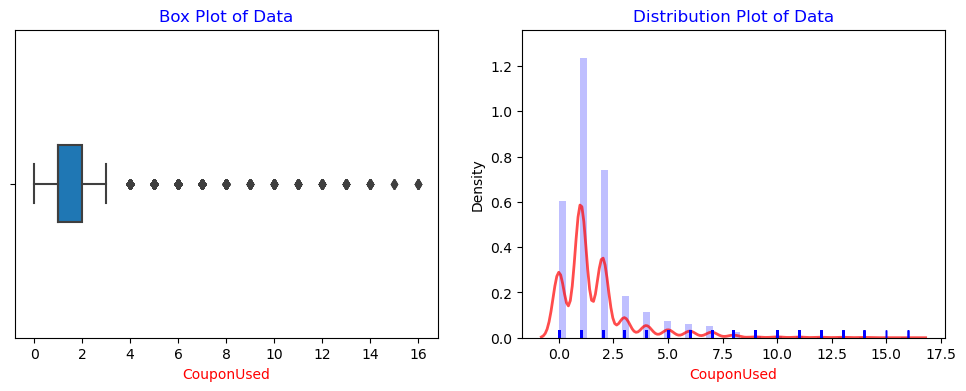

In [43]:
plot_data(data,"CouponUsed")

In [44]:
Q1 = data["CouponUsed"].quantile(0.25)
Q3 = data["CouponUsed"].quantile(0.75)
IQR = Q3 - Q1
coupondata=data[(data["CouponUsed"] >= Q1 - 1.5*IQR) & (data["CouponUsed"] <= Q3 + 1.5*IQR)]
cleandata=cleandata.merge(coupondata,how="inner",indicator=False)
print("original data count                              :",len(data))
print("Count of outlier removed data                    :",len(coupondata))
print("Count of after removing outlier of the dataframe :",len(cleandata))




original data count                              : 16890
Count of outlier removed data                    : 14955
Count of after removing outlier of the dataframe : 14334


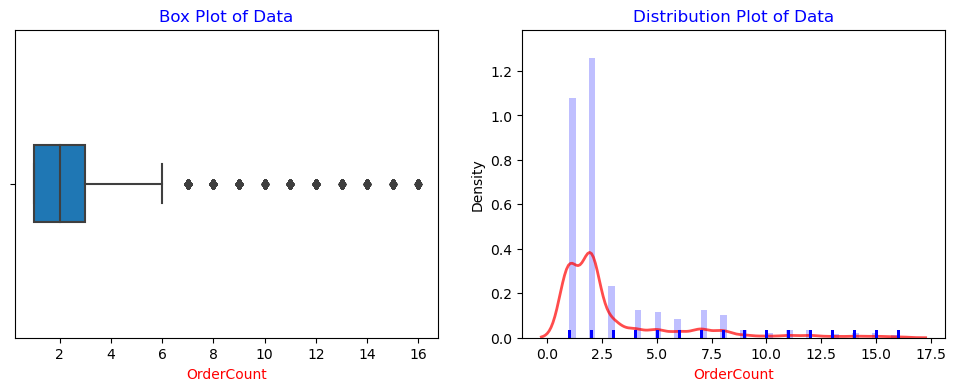

In [45]:
plot_data(data,"OrderCount")

In [46]:
Q1 = data["OrderCount"].quantile(0.25)
Q3 = data["OrderCount"].quantile(0.75)
IQR = Q3 - Q1
orderdata=data[(data["OrderCount"] >= Q1 - 3*IQR) & (data["OrderCount"] <= Q3 + 3*IQR)]
cleandata=cleandata.merge(orderdata,how="inner",indicator=False)
print("original data count                              :",len(data))
print("Count of outlier removed data                    :",len(orderdata))
print("Count of after removing outlier of the dataframe :",len(cleandata))



original data count                              : 16890
Count of outlier removed data                    : 16053
Count of after removing outlier of the dataframe : 13956


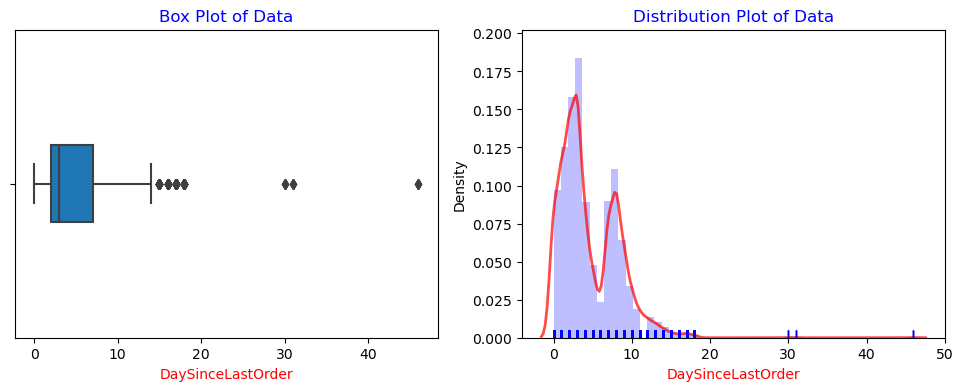

In [47]:
plot_data(data,"DaySinceLastOrder")

In [48]:
Q1 = data["DaySinceLastOrder"].quantile(0.25)
Q3 = data["DaySinceLastOrder"].quantile(0.75)
IQR = Q3 - Q1
daysdata=data[(data["DaySinceLastOrder"] >= Q1 - 3*IQR) & (data["DaySinceLastOrder"] <= Q3 + 3*IQR)]
cleandata=cleandata.merge(daysdata,how="inner",indicator=False)
print("original data count                              :",len(data))
print("Count of outlier removed data                    :",len(daysdata))
print("Count of after removing outlier of the dataframe :",len(cleandata))



original data count                              : 16890
Count of outlier removed data                    : 16881
Count of after removing outlier of the dataframe : 13950


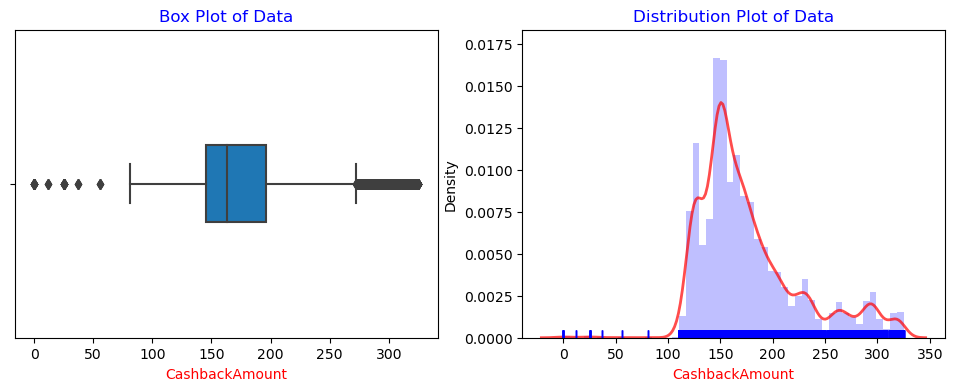

In [49]:
plot_data(data,"CashbackAmount")

In [50]:
Q1 = data["CashbackAmount"].quantile(0.25)
Q3 = data["CashbackAmount"].quantile(0.75)
IQR = Q3 - Q1
cashdata=data[(data["CashbackAmount"] >= Q1 - 3*IQR) & (data["CashbackAmount"] <= Q3 + 3*IQR)]
cleandata=cleandata.merge(cashdata,how="inner",indicator=False)
print("original data count                              :",len(data))
print("Count of outlier removed data                    :",len(cashdata))
print("Count of after removing outlier of the dataframe :",len(cleandata))


original data count                              : 16890
Count of outlier removed data                    : 16890
Count of after removing outlier of the dataframe : 13950


In [51]:
cleandata.head()

,Unnamed: 0,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,...,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,50002,1,4.0,Phone,1,8.0,UPI,Male,3.0,...,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,2,50003,1,4.0,Phone,1,30.0,Debit Card,Male,2.0,...,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,...,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
4,6,50007,1,0.0,Phone,3,11.0,Cash on Delivery,Male,2.0,...,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86


In [52]:
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13950 entries, 0 to 13949
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   13950 non-null  int64  
 1   CustomerID                   13950 non-null  int64  
 2   Churn                        13950 non-null  int64  
 3   Tenure                       13950 non-null  float64
 4   PreferredLoginDevice         13950 non-null  object 
 5   CityTier                     13950 non-null  int64  
 6   WarehouseToHome              13950 non-null  float64
 7   PreferredPaymentMode         13950 non-null  object 
 8   Gender                       13950 non-null  object 
 9   HourSpendOnApp               13950 non-null  float64
 10  NumberOfDeviceRegistered     13950 non-null  float64
 11  PreferedOrderCat             13950 non-null  object 
 12  SatisfactionScore            13950 non-null  int64  
 13  MaritalStatus   

### <span style="color: violet;">Data visualization</span>


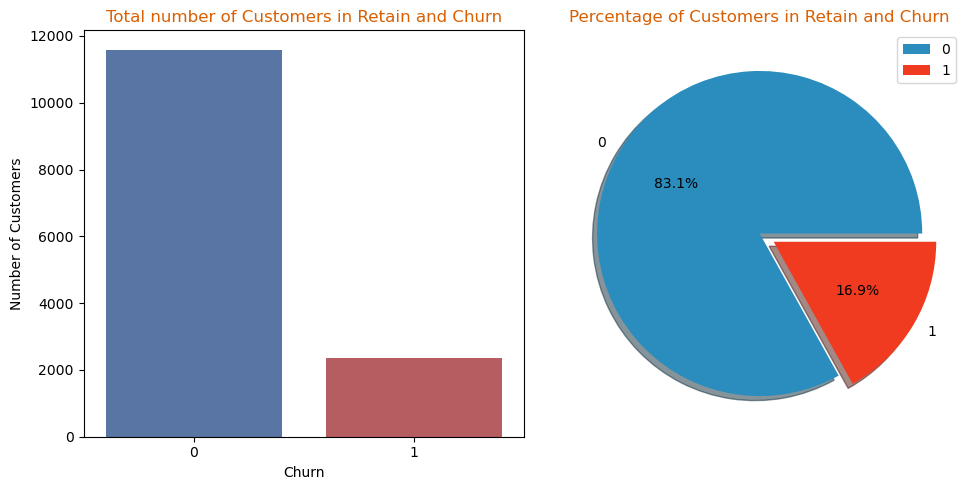

In [53]:
# create a figure with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# plot countplot on first axis
sns.countplot(x="Churn", data=cleandata, palette=["#4c72b0", "#c44e52"], ax=axes[0])
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Number of Customers")
axes[0].set_title("Total number of Customers in Retain and Churn", color="#d95f02")

# plot pie chart on second axis
colors = ["#2b8cbe", "#f03b20"]
explode = (0, 0.1)
axes[1].pie(cleandata["Churn"].value_counts(), labels=cleandata["Churn"].value_counts().index, colors=colors,
        explode=explode, autopct='%1.1f%%', shadow=True,radius=1.0)
axes[1].set_title("Percentage of Customers in Retain and Churn", color="#d95f02")
axes[1].legend()

# display the plot
plt.tight_layout()
plt.show()


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Debit Card'),
  Text(1, 0, 'UPI'),
  Text(2, 0, 'CC'),
  Text(3, 0, 'Cash on Delivery'),
  Text(4, 0, 'COD'),
  Text(5, 0, 'Credit Card'),
  Text(6, 0, 'E wallet')])

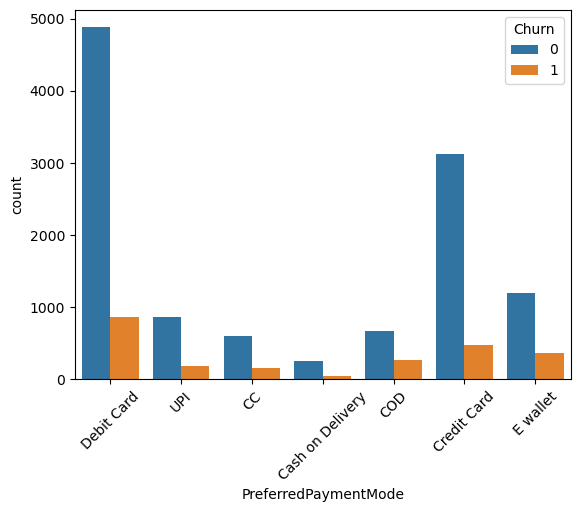

In [54]:
sns.countplot(x=cleandata["PreferredPaymentMode"].value_counts() ,data=cleandata, )
sns.countplot(x='PreferredPaymentMode', hue='Churn',  data=cleandata)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='SatisfactionScore', ylabel='count'>

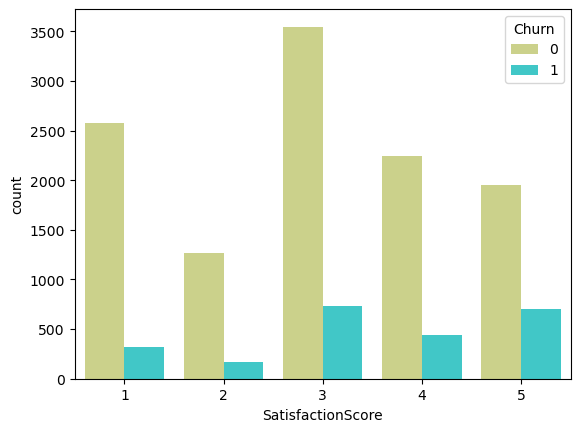

In [55]:
sns.countplot(x='SatisfactionScore', hue='Churn', palette='rainbow_r', data=cleandata)

<AxesSubplot:xlabel='Complain', ylabel='count'>

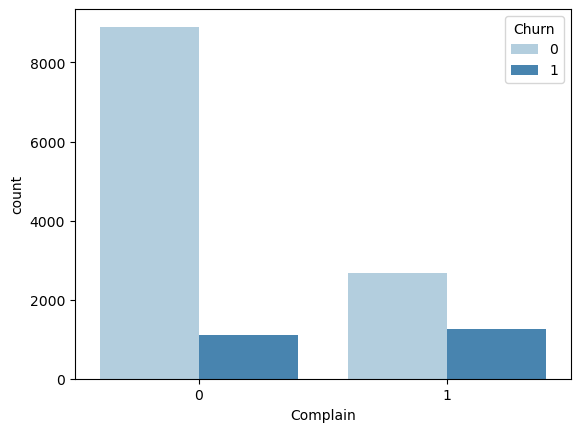

In [56]:
sns.countplot(x='Complain', hue='Churn', palette='Blues', data=cleandata)

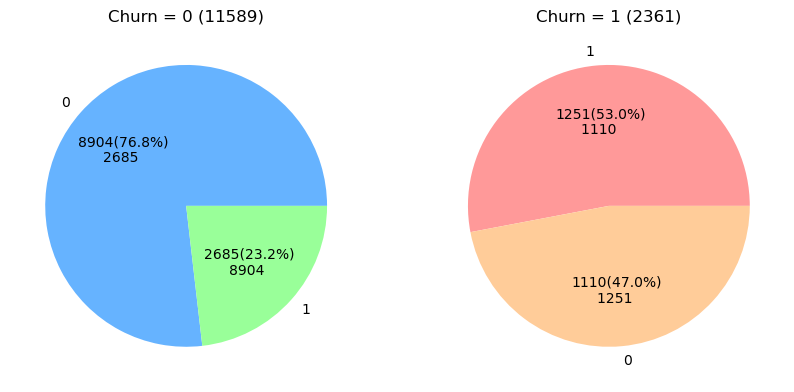

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_0 = cleandata[cleandata['Churn'] == 0]['Complain'].value_counts()
churn_1 = cleandata[cleandata['Churn'] == 1]['Complain'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(churn_0.values, labels=churn_0.index, autopct=lambda x: f'{int(round(x*sum(churn_0)/100))}({x:.1f}%)\n{churn_0[churn_0.index[int(x/100*len(churn_0))]]} ', colors=['#66b3ff', '#99ff99'])
ax1.set_title(f'Churn = 0 ({cleandata[cleandata["Churn"] == 0].shape[0]})')

ax2.pie(churn_1.values, labels=churn_1.index, autopct=lambda x: f'{int(round(x*sum(churn_1)/100))}({x:.1f}%)\n{churn_1[churn_1.index[int(x/100*len(churn_1))]]} ', colors=['#ff9999', '#ffcc99'])
ax2.set_title(f'Churn = 1 ({cleandata[cleandata["Churn"] == 1].shape[0]})')

plt.show()


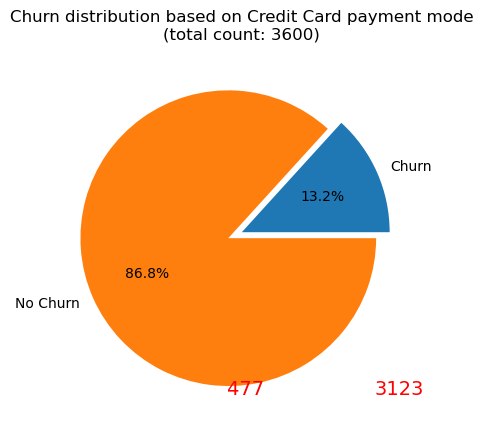

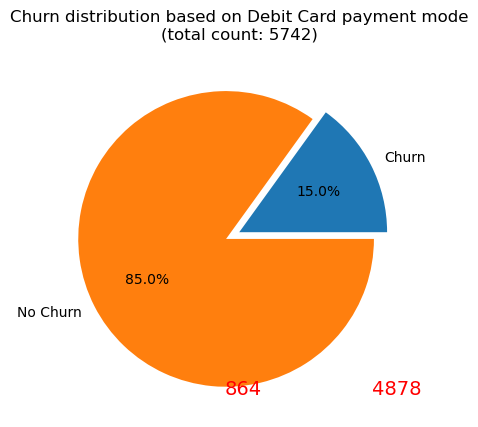

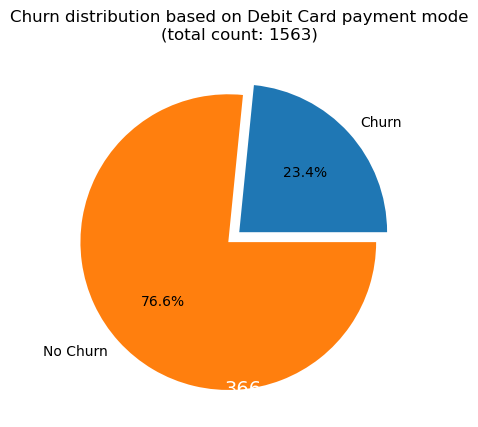

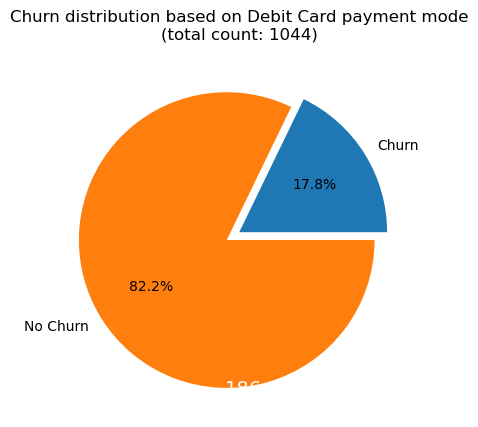

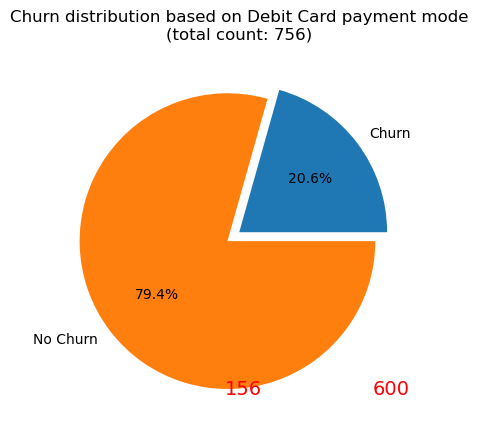

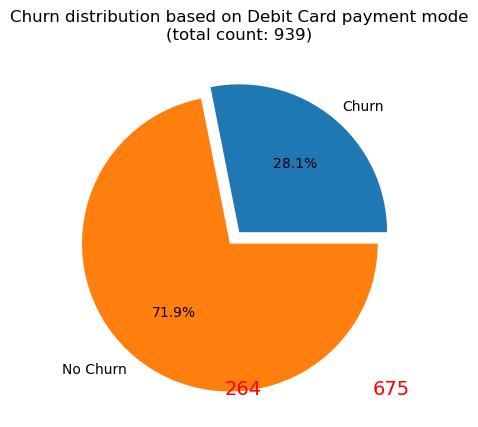

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns


credit = cleandata[cleandata['PreferredPaymentMode'] == "Credit Card"]['Churn'].value_counts()
values = [credit[1], credit[0]]
labels = ['Churn', 'No Churn']
total_churn = sum(values)
plt.pie(values, labels=labels, autopct='%1.1f%%',explode=explode)
plt.title(f'Churn distribution based on Credit Card payment mode\n(total count: {total_churn})')
for i, value in enumerate(values):
    plt.text(i - 0.1, -1.1, str(value), color='red', fontsize=14)
plt.show()

debit = cleandata[cleandata['PreferredPaymentMode'] == "Debit Card"]['Churn'].value_counts()
values = [debit[1], debit[0]]
labels = ['Churn', 'No Churn']
total_churn = sum(values)
plt.pie(values, labels=labels, autopct='%1.1f%%',explode=explode)
plt.title(f'Churn distribution based on Debit Card payment mode\n(total count: {total_churn})')
for i, value in enumerate(values):
    plt.text(i - 0.1, -1.1, str(value), color='red', fontsize=14)
plt.show()

debit = cleandata[cleandata['PreferredPaymentMode'] == "E wallet"]['Churn'].value_counts()
values = [debit[1], debit[0]]
labels = ['Churn', 'No Churn']
total_churn = sum(values)
plt.pie(values, labels=labels, autopct='%1.1f%%',explode=explode)
plt.title(f'Churn distribution based on Debit Card payment mode\n(total count: {total_churn})')
for i, value in enumerate(values):
    plt.text(i - 0.1, -1.1, str(value), color='white', fontsize=14)
plt.show() 

debit = cleandata[cleandata['PreferredPaymentMode'] == "UPI"]['Churn'].value_counts()
values = [debit[1], debit[0]]
labels = ['Churn', 'No Churn']
total_churn = sum(values)
plt.pie(values, labels=labels, autopct='%1.1f%%',explode=explode)
plt.title(f'Churn distribution based on Debit Card payment mode\n(total count: {total_churn})')
for i, value in enumerate(values):
    plt.text(i - 0.1, -1.1, str(value), color='white', fontsize=14)
plt.show() 

debit = cleandata[cleandata['PreferredPaymentMode'] == "CC"]['Churn'].value_counts()
values = [debit[1], debit[0]]
labels = ['Churn', 'No Churn']
total_churn = sum(values)
plt.pie(values, labels=labels, autopct='%1.1f%%',explode=explode)
plt.title(f'Churn distribution based on Debit Card payment mode\n(total count: {total_churn})')
for i, value in enumerate(values):
    plt.text(i - 0.1, -1.1, str(value), color='red', fontsize=14)
plt.show()

debit = cleandata[cleandata['PreferredPaymentMode'] == "COD"]['Churn'].value_counts()
values = [debit[1], debit[0]]
labels = ['Churn', 'No Churn']
total_churn = sum(values)
plt.pie(values, labels=labels, autopct='%1.1f%%',explode=explode)
plt.title(f'Churn distribution based on Debit Card payment mode\n(total count: {total_churn})')
for i, value in enumerate(values):
    plt.text(i - 0.1, -1.1, str(value), color='red', fontsize=14)
plt.show()

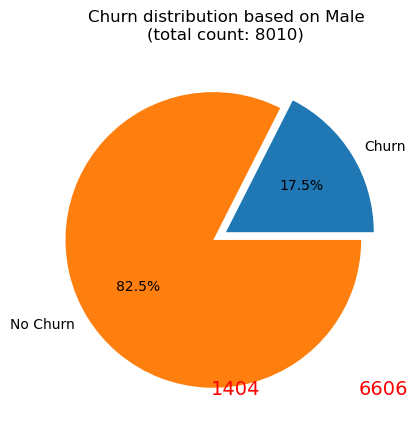

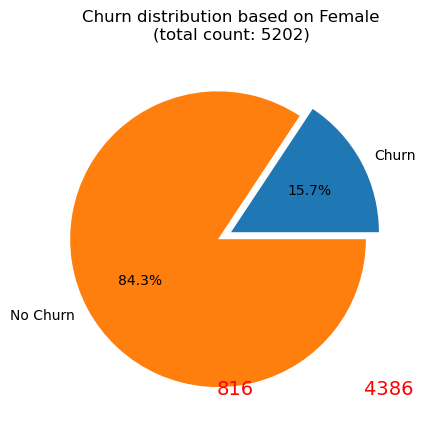

In [59]:
debit = cleandata[cleandata['Gender'] == "Male"]['Churn'].value_counts()

values = [debit[1], debit[0]]
labels = ['Churn', 'No Churn']
total_churn = sum(values)
plt.pie(values, labels=labels, autopct='%1.1f%%',explode=explode)
plt.title(f'Churn distribution based on Male\n(total count: {total_churn})')

for i, value in enumerate(values):
    plt.text(i - 0.1, -1.1, str(value), color='red', fontsize=14)
plt.show() 

debit = cleandata[cleandata['Gender'] == "Female"]['Churn'].value_counts()
values = [debit[1], debit[0]]
labels = ['Churn', 'No Churn']
total_churn = sum(values)
plt.pie(values, labels=labels, autopct='%1.1f%%',explode=explode)
plt.title(f'Churn distribution based on Female\n(total count: {total_churn})')

for i, value in enumerate(values):
    plt.text(i - 0.1, -1.1, str(value), color='red', fontsize=14)
plt.show() 

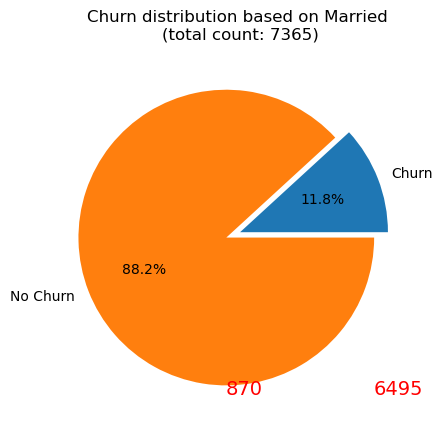

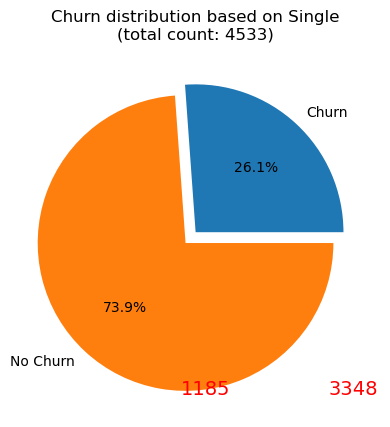

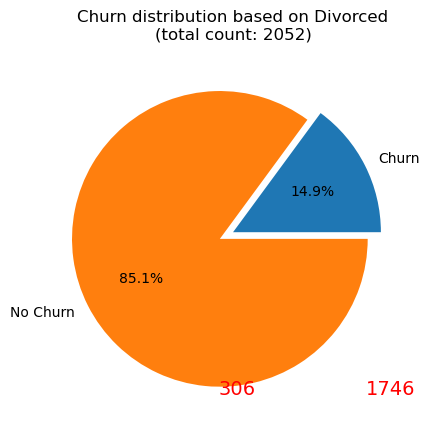

In [60]:
debit = cleandata[cleandata['MaritalStatus'] == "Married"]['Churn'].value_counts()

values = [debit[1], debit[0]]
labels = ['Churn', 'No Churn']
total_churn = sum(values)
plt.pie(values, labels=labels, autopct='%1.1f%%',explode=explode)
plt.title(f'Churn distribution based on Married \n(total count: {total_churn})')

for i, value in enumerate(values):
    plt.text(i - 0.1, -1.1, str(value), color='red', fontsize=14)
plt.show() 

debit = cleandata[cleandata['MaritalStatus'] == "Single"]['Churn'].value_counts()
values = [debit[1], debit[0]]
labels = ['Churn', 'No Churn']
total_churn = sum(values)
plt.pie(values, labels=labels, autopct='%1.1f%%',explode=explode)
plt.title(f'Churn distribution based on Single\n(total count: {total_churn})')

for i, value in enumerate(values):
    plt.text(i - 0.1, -1.1, str(value), color='red', fontsize=14)
plt.show() 

debit = cleandata[cleandata['MaritalStatus'] == "Divorced"]['Churn'].value_counts()
values = [debit[1], debit[0]]
labels = ['Churn', 'No Churn']
total_churn = sum(values)
plt.pie(values, labels=labels, autopct='%1.1f%%',explode=explode)
plt.title(f'Churn distribution based on Divorced\n(total count: {total_churn})')

for i, value in enumerate(values):
    plt.text(i - 0.1, -1.1, str(value), color='red', fontsize=14)
plt.show() 

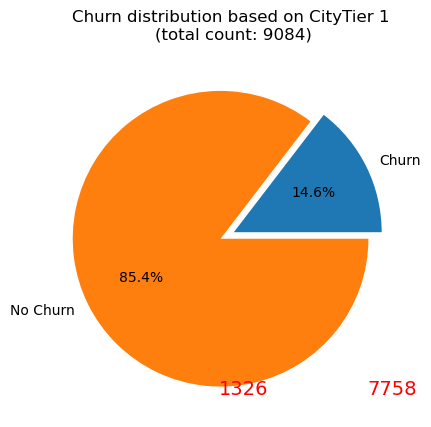

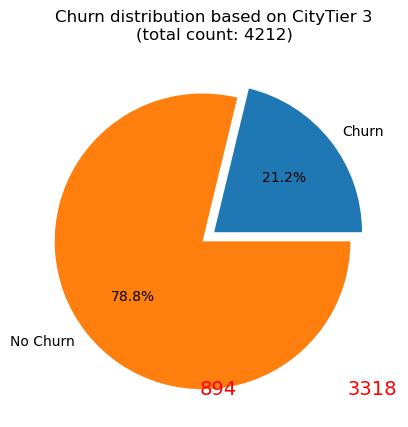

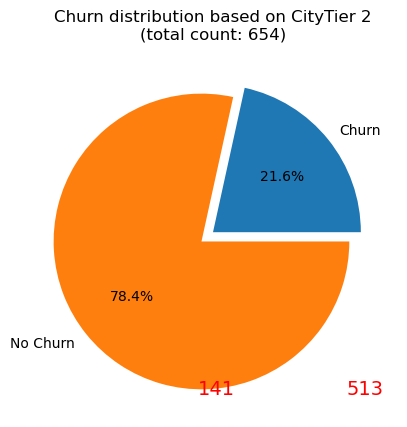

In [61]:
debit = cleandata[cleandata['CityTier'] == 1]['Churn'].value_counts()

values = [debit[1], debit[0]]
labels = ['Churn', 'No Churn']
total_churn = sum(values)
plt.pie(values, labels=labels, autopct='%1.1f%%',explode=explode)
plt.title(f'Churn distribution based on CityTier 1 \n(total count: {total_churn})')

for i, value in enumerate(values):
    plt.text(i - 0.1, -1.1, str(value), color='red', fontsize=14)
plt.show() 

debit = cleandata[cleandata['CityTier'] == 3]['Churn'].value_counts()
values = [debit[1], debit[0]]
labels = ['Churn', 'No Churn']
total_churn = sum(values)
plt.pie(values, labels=labels, autopct='%1.1f%%',explode=explode)
plt.title(f'Churn distribution based on CityTier 3\n(total count: {total_churn})')

for i, value in enumerate(values):
    plt.text(i - 0.1, -1.1, str(value), color='red', fontsize=14)
plt.show() 

debit = cleandata[cleandata['CityTier'] == 2]['Churn'].value_counts()
values = [debit[1], debit[0]]
labels = ['Churn', 'No Churn']
total_churn = sum(values)
plt.pie(values, labels=labels, autopct='%1.1f%%',explode=explode)
plt.title(f'Churn distribution based on CityTier 2\n(total count: {total_churn})')

for i, value in enumerate(values):
    plt.text(i - 0.1, -1.1, str(value), color='red', fontsize=14)
plt.show() 

In [62]:
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13950 entries, 0 to 13949
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   13950 non-null  int64  
 1   CustomerID                   13950 non-null  int64  
 2   Churn                        13950 non-null  int64  
 3   Tenure                       13950 non-null  float64
 4   PreferredLoginDevice         13950 non-null  object 
 5   CityTier                     13950 non-null  int64  
 6   WarehouseToHome              13950 non-null  float64
 7   PreferredPaymentMode         13950 non-null  object 
 8   Gender                       13950 non-null  object 
 9   HourSpendOnApp               13950 non-null  float64
 10  NumberOfDeviceRegistered     13950 non-null  float64
 11  PreferedOrderCat             13950 non-null  object 
 12  SatisfactionScore            13950 non-null  int64  
 13  MaritalStatus   

In [63]:
cleandata.to_csv('clean_data.csv', index=False)